# Advanced dimensionality reduction techniques

## What to expect:
   1. What is Advanced Dimenionality Reduction
   1. Multi-dimensional scaling (MDS)
   1. t-distributed stochastic neighbor embedding (t-SNE)
   1. Comparative Table of the Three Techniques

## Objectives:
* The high level understanding of Advanced Dimenionality Reduction
* Alternatives to PCA!
* Being aware of MDS and t-sne's unique way of reducing dimensionality

---

## 1. What is Advanced Dimensionality Reduction

### Definition:
* Dimensionality reduction simply refers to the process of reducing the number of attributes in a dataset while keeping as much of the variation in the original dataset as possible. 

### Example: 
* For example, let’s take a very simple dataset containing 2 attributes called Height and Weight. This is a 2-dimensional dataset and any observation of this dataset can be plotted in a 2D plot.

<img src= 'https://miro.medium.com/v2/resize:fit:902/format:webp/1*GL1S7IF83m8wwWi38vLZmQ.png' width = 250>

* If we add another dimension called Age to the same dataset, it becomes a 3-dimensional dataset and any observation lies in the 3-dimensional space.

<img src= 'https://miro.medium.com/v2/resize:fit:1242/format:webp/1*lRI-1S8SOk_r1nLkXrrVeg.png' width = 300>

<img src ='https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExY256dWdvdWN2Z3l4N29jNHZwZXNhOHhibmZtZnNyOHVtazViMmZraSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/YFHH1rh5Zx58k/giphy.gif' width = 300>

However it starts to become challenging to visualize data after having a 3 "dimensional" dataset especially when this can go on to infinity!

### Why Dimenionality Reduction is usefull

Like we discussed when we introduced PCA. Working with limitless data (for now) is very difficult for any computer or machine to process. Dimensionality reduction is a technique used to reduce the number of features in a dataset while **retaining as much of the important information as possible**. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

---

## 2. Multi-dimensional scaling (MDS)

### Definition:
* Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

#### Explanation:
* In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as **distances in a geometric spaces**. 
* The **stress** is a measure of the degree to which distances between points in the original feature space correspond with the distances in the low-dimensional space. A **lower stress value is preferred**, and it is this quantity that is minimised by MDS.

**Note:** 
* MDS can be performed using algorithms that are either metric or non-metric. Non-metric approaches are typically used to preserve **ordinality (order) within data**. This is more of a necessity when there are **categorical features present** in the data. While metric approaches are better suited for purely numeric instances.

### Syntax:
```python
#Importing MDS from sklearn
from sklearn.manifold import MDS

#MDS and its parameters
MDS = MDS(n_components=2, 
                   n_init=4, 
                   max_iter=200,
                   n_jobs=-1,
                   random_state=42,
                   dissimilarity='euclidean')
```

**Parameters**:
* **n_components**, default=2. 
    - Number of dimensions in which to immerse the dissimilarities.
* **n_init**, default=4. 
    - Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.
* **max_iter**, default=300. 
    - Maximum number of iterations of the SMACOF algorithm for a single run.
* **n_jobs**, default=None. 
    - The number of jobs to use for the computation. If multiple initializations are used (n_init), each run of the algorithm is computed in parallel.
* **dissimilarity** default=’euclidean’. 
    - Dissimilarity measure to use:‘euclidean’:Pairwise Euclidean distances between points in the dataset.

### Example:

In [1]:
# Importing all your tools you need!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Now for the main event! 
from sklearn.manifold import MDS

In [2]:
# Stop me if you heard of this one. So there was an iris dataset...
from sklearn.datasets import load_iris

In [3]:
#Load Dataframe
iris = load_iris()

In [4]:
# Extract features and target
X = iris.data
y = iris.target

In [5]:
#Convert to Pandas Dataframe
iris_df= pd.DataFrame(data =iris.data, columns = iris.feature_names)

In [6]:
# Time to "target" the target!
iris_df['target'] = iris.target

In [7]:
# Healthy Reminder!
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Perform MDS to reduce the dimensionality to 2D
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

Text(0.5, 0.92, 'Original Data')

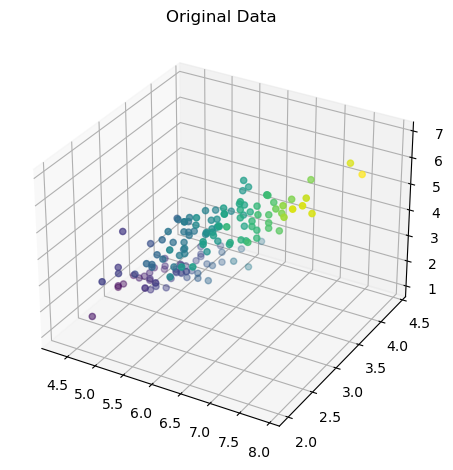

In [9]:
# Plot original data in 3D
 # Create a figure object with a specified size
fig = plt.figure(figsize=(12, 6))
# Add a subplot for the original data with 3D projection
ax1 = fig.add_subplot(121, projection='3d') 

# Scatter plot of the original data in 3D
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap=plt.cm.viridis)

# Set title for the subplot
ax1.set_title('Original Data')  

---

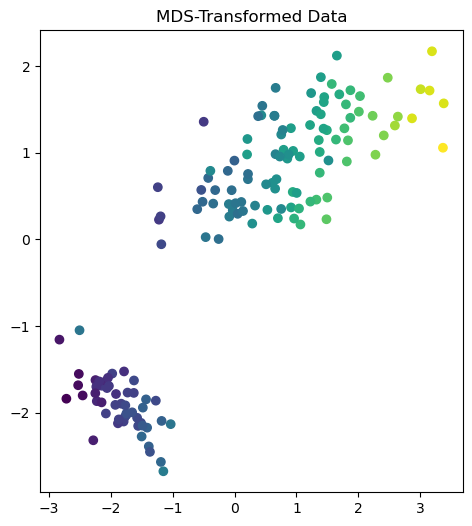

In [10]:
# Plot MDS-transformed data in 2D
fig = plt.figure(figsize=(12, 6))
# Add a subplot for the MDS-transformed data
ax2 = fig.add_subplot(122)  
# Scatter plot of the MDS-transformed data
ax2.scatter(X_mds[:, 0], X_mds[:, 1], c=X[:, 0], cmap=plt.cm.viridis)
# Set title for the subplot
ax2.set_title('MDS-Transformed Data')  
plt.show()

In the provided code, the dissimilarity measure used by default for MDS is the Euclidean distance. This is because the default behavior of the MDS class in scikit-learn (sklearn.manifold.MDS) is to use metric MDS, which aims to preserve the pairwise Euclidean distances between data points in the lower-dimensional space.

However, even though we see some seperation even before we have tried to "actually" do so. There may be a better way to reduce the Dimensionaliity and still keeping the data points `original` dimensionality...

---

## 3. T-Distributed Stochastic Neighbor Embedding (t-SNE)

### Definition: 

* T-distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique commonly used for visualizing **high-dimensional data in a lower-dimensional space**, typically 2D or 3D. It is particularly **effective for visualizing complex, non-linear relationships in the data**.

* In t-SNE, each high-dimensional data point is first represented as a **probability distribution** in the high-dimensional space, with similarities between points modeled as conditional probabilities. Then, t-SNE seeks to find a lower-dimensional representation of the data points where the pairwise similarities are approximately preserved.

### Explination:
* **Non-linear transformation**: A non-linear transformation means taking these points and mapping them to a lower-dimensional space (usually 2D or 3D) in a way that doesn't strictly maintain their original distances.
    * Unlike linear transformations, which simply rotate, stretch, or compress the space, non-linear transformations can **twist, bend, and curve the space**, allowing for more complex relationships between points to be captured.

* **Preserves both local and global structure (usually)**: In your original high-dimensional space, each point might have neighboring points that are close to it (local structure), and there might also be larger-scale patterns or clusters of points (global structure).
    * When we perform the non-linear transformation, we want to preserve these relationships as much as possible. This means that points that were close together in the high-dimensional space should still be close together in the lower-dimensional space.

* **Computationally expensive**: For each iteration of the transformation, the algorithm needs to consider all pairwise distances between points in the high-dimensional space, and this computation can become very intensive as the number of points grows.

### Syntax:

```python
# Now for the main event (Again)! 
from sklearn.manifold import TSNE

#t-sne model and parameters
tsne = TSNE(n_components=2,
                     perplexity=40,
                     metric='euclidean',
                     init='pca',
                     verbose=1,
                     random_state=42)
```

**Paramaters**
* **n_components**, default=2. 
    - Dimension of the embedded space.
* **perplexity**, default=30.0. 
    - (loosely) How to balance attention between local and global aspects of your data. 
* **metric**, default=’euclidean’ 
    - The metric to use when calculating distance between instances in a feature array. 
* **init** default=”pca” 
    - Initialization of embedding.
* **verbose**, default=0 
    - Verbosity level.

### Example:

In [11]:
# Now for the main event (Again)! 
from sklearn.manifold import TSNE

In [12]:
# Extract features and target
X_t = iris.data
y_t = iris.target

In [13]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_t)

In [14]:
# Create DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Feature 1', 't-SNE Feature 2'])
tsne_df['Species'] = iris.target_names[y]

In [15]:
tsne_df.head()

,t-SNE Feature 1,t-SNE Feature 2,Species
0,-23.875437,-1.430589,setosa
1,-21.332832,-2.522965,setosa
2,-21.183956,-1.316485,setosa
3,-20.842545,-1.611920,setosa
4,-23.845785,-0.945733,setosa


The values in the `'t-SNE Feature 1'` and `'t-SNE Feature 2'` columns of the DataFrame tsne_df represent the **lower-dimensional representations of the original data points** obtained through t-Distributed Stochastic Neighbor Embedding (t-SNE) dimensionality reduction technique.

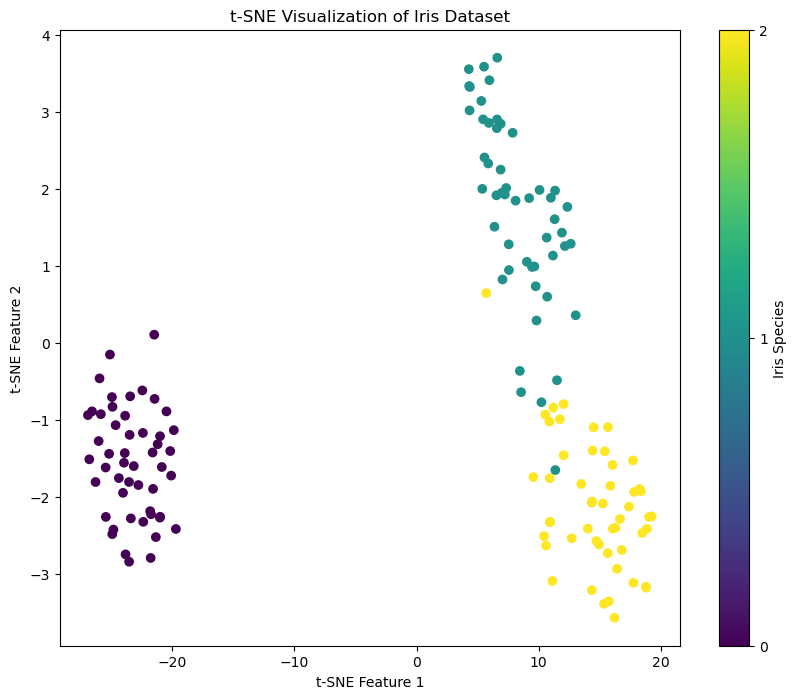

In [16]:
# Plot t-SNE results
plt.figure(figsize=(10, 8))
# Add a scatterplot for the t-sne-transformed data
plt.scatter(tsne_df['t-SNE Feature 1'], tsne_df['t-SNE Feature 2'], c=y, cmap=plt.cm.viridis)
# Add a colour bar
plt.colorbar(ticks=range(3), label='Iris Species')
# Add a Title
plt.title('t-SNE Visualization of Iris Dataset')
# x-intercept label
plt.xlabel('t-SNE Feature 1')
# y-intercept label
plt.ylabel('t-SNE Feature 2')
plt.show()

***Just incase you looking at t-sne for the first time**:
In this case, we have demonstrated the power of t-SNE as a tool for exploratory data analysis and to reveal `natural groups`, or `clusters`, within datasets.

**NB!** Your notebook on Athena talks about the **Warnings** about t-sne. Take a look!

---

## 4. Comparative Table of the Three Techniques

| Technique | Description | Computational Complexity |
|-----------|-------------|--------------------------|
| PCA       | PCA (Principal Component Analysis) is a linear dimensionality reduction technique that aims to find a lower-dimensional representation of the data while **preserving as much variance as possible** . | PCA has a computational **complexity of O(n²)**. |
| MDS       | MDS (Multidimensional Scaling) is a technique for visualizing the level of **similarity or dissimilarity between data points in a lower-dimensional space**, aiming to preserve pairwise **distances** or dissimilarities as closely as possible. | The computational complexity of MDS depends on the specific algorithm used, **typically O(n³)**. |
| t-SNE     | t-SNE (t-distributed Stochastic Neighbor Embedding) is a **non-linear dimensionality reduction technique** effective for visualizing complex, high-dimensional data in a lower-dimensional space by **preserving both local and global structure through modeling similarities as conditional probabilities**. | t-SNE has a computational **complexity of O(n²)**. |

---

## Objectives:
* The high level understanding of Advanced Dimenionality Reduction
* Alternatives to PCA!
* Being aware of MDS and t-sne's unique way of reducing dimensionality